In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def gen_times(lam, size):
    return np.random.poisson(lam, size)

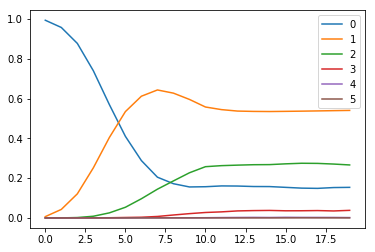

In [3]:
C = 4
sec = 20
lam = 5
mu = 6

statistic = [[] for i in range(10000)]

for stat in statistic:
    last_time = 0

    queue = []
    channels = np.zeros(C)
    requests = gen_times(lam, sec)
    requests_time = []

    for i in requests:
        requests_time.append(i+last_time)
        last_time+=i
        if last_time > sec:
            break
    requests_time = np.array(requests_time)
    requests_index = 0

    for time in range(sec):
        while requests_time[requests_index] == time:
            queue.append(time)
            requests_index+=1
        stat.append(np.sum(channels > time) + len(queue))
        if queue and np.sum(channels <= time):
            channels[np.argwhere(channels <= time)[0]] = time + gen_times(mu, 1)[0]
            queue = queue[1:]

final_stat = [[] for _ in np.unique(statistic)]
for stat_sec in np.array(statistic).T:
    for i in np.unique(statistic):
        final_stat[i].append(np.sum(stat_sec==i) /
                             len(stat_sec))
for i, stat in enumerate(final_stat):
    plt.plot(range(len(stat)), stat, label="{}".format(np.unique(statistic)[i]))
plt.legend()
plt.show()